# Calculate robusteness from pi control runs

In [87]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [88]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [89]:
def num_coevents(y1, y2, pct1, pct2, runs='picontrol',loc='cclme'):
    # 
    fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
    fin2 = fdir+'original ts/'+runs+'_sm.nc'
    modsst = xr.open_dataset(fin1)
    modsst.close()
    modsm2 = xr.open_dataset(fin2)
    modsm2.close()
    
    models = modsm2.model

    # selec periood
    modsst = modsst.sel(year=slice(y1,y2))
    #modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm2 = modsm2.sel(year=slice(y1,y2))

    
    nev = list()
    mhw = list()
    drt = list()
    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1= modsst.sel(model=i).sst.values - modsst.sel(model=i).sst.mean().values
        tmp2= modsm2.sel(model=i).sm.values - modsm2.sel(model=i).sm.mean().values
      
        # calculate threshold
        mhw_thr = np.nanpercentile(tmp1,pct1)
        drg_thr = np.nanpercentile(tmp2,pct2)
    
        a1 = tmp1>=mhw_thr
        a2 = tmp2<=drg_thr
        
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2]

        tmp1 = np.full((len(modsst.year.values),1),1)
        tmp1 = tmp1[a1]
        tmp2 = np.full((len(modsst.year.values),1),1)
        tmp2 = tmp2[a2]
        
        nev.append(len(tmp)/30*100)
        mhw.append(len(tmp1)/30*100)
        drt.append(len(tmp2)/30*100)
        
    return nev, mhw, drt # sum(nev)

In [90]:
ny = 30
prc1 = 90
prc2 = 10
loc='cclme'
pinev=list()
pim=list()
pid=list()
for i in range(int(500/ny)):
    nev,m0,d0 = num_coevents(i*ny+1, (i+1)*ny, prc1 , prc2, loc=loc)
    pinev.append(nev)
    pim.append(m0)
    pid.append(d0)
pinev,np.mean(pinev),np.mean(pim), np.mean(pid) 

([[3.3333333333333335,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   10.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   0.0],
  [0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   3.3333333333333335,
   3.3333333333333335,
   0.0,
   3.3333333333333335,
   0.0,
   0.0,
   3.333333333333

In [91]:
#model by model

In [92]:
model_mean=np.mean(pinev,axis=0)
model_spread=np.std(pinev,axis=0)
IV=(np.sum((model_spread*model_spread))/22)**.5
IV,model_spread

(1.49110896125784,
 array([1.86338998, 0.        , 1.54504135, 1.54504135, 1.10239638,
        1.10239638, 1.94320397, 1.44337567, 0.80687153, 1.30104125,
        2.03058216, 1.65359457, 1.61374306, 0.80687153, 2.8182811 ,
        1.10239638, 1.30104125, 1.54504135, 1.44337567, 1.30104125,
        1.10239638, 1.30104125]))

In [93]:
model_mean

array([0.83333333, 0.        , 1.04166667, 1.04166667, 0.41666667,
       0.41666667, 1.04166667, 0.83333333, 0.20833333, 0.625     ,
       1.45833333, 1.45833333, 1.25      , 0.20833333, 2.29166667,
       0.41666667, 0.625     , 1.04166667, 0.83333333, 0.625     ,
       0.41666667, 0.625     ])

In [94]:
#16 30-yr periods MMEs

In [95]:
mme_mean=np.mean(pinev,axis=1)
mme_spread=np.std(pinev,axis=1)
#internal variability mean and spread
mme_mean,np.mean(mme_spread)

(array([0.75757576, 1.66666667, 0.45454545, 0.90909091, 0.60606061,
        0.60606061, 0.75757576, 0.60606061, 1.06060606, 1.36363636,
        0.60606061, 0.60606061, 0.75757576, 0.15151515, 1.36363636,
        0.60606061]),
 1.488695723967351)

In [96]:
#MME mean and spread

In [97]:
mme_model_mean=np.mean(mme_mean)
mme_model_spread=np.std(mme_mean)
mme_model_mean,mme_model_spread

(0.8049242424242424, 0.37390316330302337)

In [98]:
#cross model mean and spread

In [99]:
cross_model_mean=np.mean(model_mean)
cross_model_spread=np.std(model_mean)
cross_model_mean,cross_model_spread

(0.8049242424242425, 0.5036775055671289)

In [100]:
IV,cross_model_spread,mme_model_spread,np.std(pinev),np.std(pinev)-IV

(1.49110896125784,
 0.5036775055671289,
 0.37390316330302337,
 1.5738795900442193,
 0.0827706287863792)

In [101]:
## Calculate thresholds for PI Control runs

In [102]:
def get_thre(loc,y1,y2,prc1,prc2):
    # open data: anomalies (without trend)

    modsst = xr.open_dataset(fdir+'original ts/picontrol_'+loc+'_sst.nc')
    modsst.close()
    modsm2 = xr.open_dataset(fdir+'original ts/picontrol_sm.nc')
    modsm2.close()

    # select period 
    modsst = modsst.sel(year=slice(y1,y2))
    #modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm2 = modsm2.sel(year=slice(y1,y2))


    mhw_thr = list()
    drg_thr = list()
    models = list()
    mean1 = list()
    mean2 = list()

    # Calculate thresholds for each model
    for ix,i in enumerate(modsm2.model.values):
        tmp1= modsst.sel(model=i).sst.values - modsst.sel(model=i).sst.mean().values
        tmp2= modsm2.sel(model=i).sm.values - modsm2.sel(model=i).sm.mean().values
        mean_tmp1=modsst.sel(model=i).sst.mean().values
        mean_tmp2=modsm2.sel(model=i).sm.mean().values

         
        mhw_thr.append(np.nanpercentile(tmp1,prc1))
        drg_thr.append(np.nanpercentile(tmp2,prc2))

        models.append(i)
        mean1.append(mean_tmp1)
        mean2.append(mean_tmp2)
    
    return mhw_thr, drg_thr , models,mean1,mean2

In [103]:
# calculate number of events for control, historical and future
# based on pi control thresholds

def freq_coevents(fdir, runs,loc, mhw_thr, drg_thr, models,mean1,mean2, y1, y2):
    #pi control
    fi1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
    fi2 = fdir+'original ts/'+runs+'_sm.nc'
    modsst = xr.open_dataset(fi1)
    modsst.close()
    modsm2 = xr.open_dataset(fi2)
    modsm2.close()
    models=modsm2.model

    # select period
    modsst = modsst.sel(year=slice(y1,y2))
    modsm2 = modsm2.sel(year=slice(y1,y2))

    nev = list()
    drt=list()
    mhw=list()

    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1= modsst.sel(model=i).sst.values-mean1[ix]
        tmp2= modsm2.sel(model=i).sm.values-mean2[ix]

        a1 = tmp1>=mhw_thr[ix]
        a2 = tmp2<=drg_thr[ix]
        tmp = np.full((len(modsst.year.values),1),1)
        tmp = tmp[a1*a2]
        
        tmp1 = np.full((len(modsst.year.values),1),1)
        tmp1 = tmp1[a1]
        tmp2 = np.full((len(modsst.year.values),1),1)
        tmp2 = tmp2[a2]
        
        nev.append(len(tmp)/30*100)
        mhw.append(len(tmp1)/30*100)
        drt.append(len(tmp2)/30*100)
    freq = np.array(nev) #/(y2-y1+1)
    
    return nev,  mhw, drt #mean no. of events
#freq, np.round(np.nanmean(freq),4), np.round(np.nanstd(freq),4) #mean frequency


In [104]:
def freq_difruns(loc, ny, y0,y,prc1, prc2):
    
    # calculate threshold in pi control
    #y2=2014
    #y1=y2-ny+1
    mhw_thr, drg_thr, models,mean1,mean2 = get_thre(loc,y0,y,prc1,prc2)

    print ('Percentiles: '+str(prc1)+'/'+str(prc2))
    # pi control
    print('piControl: '+str(y0)+'-'+str(y))
    #y2=2014
    #y1=y2-ny+1
    freq0, mfrq, sfrq = freq_coevents(fdir,'picontrol',loc,mhw_thr,drg_thr, models,mean1,mean2,y0,y)
    print(mfrq,sfrq)

    # historical 2
    y2=2029
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq1, mfrq1, sfrq1 = freq_coevents(fdir,'histssp585',loc,mhw_thr,drg_thr, models,mean1,mean2, y1,y2)
    print(mfrq1,sfrq1)

    # historical 2
    y2=2014
    y1=y2-ny+1
    print('\nhistorical 2: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'historical',loc,mhw_thr,drg_thr, models,mean1,mean2, y1,y2)
    print(mfrq,sfrq)

    # future
    y2=2099
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq2, mfrq2, sfrq2 = freq_coevents(fdir,'ssp585',loc,mhw_thr,drg_thr, models,mean1,mean2, y1,y2)
    print(mfrq2,sfrq2)
    
    # future 2
    y2=2044
    y1=y2-ny+1
    print('\nfuture: '+str(y1)+'-'+str(y2))
    freq, mfrq, sfrq = freq_coevents(fdir,'ssp585',loc,mhw_thr,drg_thr, models,mean1,mean2, y1,y2)
    print(mfrq,sfrq)
    
    return freq0,freq1,freq2,mfrq1, sfrq1,mfrq2, sfrq2

In [105]:
# Frequency of events - detrended data, using pi control threshols
## percentiles 90-10

In [106]:

print ('\nPercentiles: '+str(prc1)+'/'+str(prc2))
print('\nProbable # events in '+str(ny)+' years'+': '+str(ny*0.01))

funev=list()
hinev=list()
test=list()
him=list()
hid=list()
fum=list()
fud=list()
for i in range(int(500/ny)):
    pi,hi,fu,m1,d1,m2,d2 = freq_difruns(loc,ny,i*ny+1, (i+1)*ny, prc1, prc2)
    test.append(pi)
    funev.append(fu)
    hinev.append(hi)
    him.append(m1)
    hid.append(d1)
    fum.append(m2)
    fud.append(d2)
np.mean(funev),np.mean(hinev),np.mean(him),np.mean(hid),np.mean(fum),np.mean(fud)


Percentiles: 90/10

Probable # events in 30 years: 0.3
Percentiles: 90/10
piControl: 1-30
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[43.333333333333336, 56.666666666666664, 66.66666666666666, 90.0, 46.666666666666664, 66.66666666666666, 73.33333333333333, 100.0, 100.0, 80.0, 86.66666666666667, 96.66666666666667, 86.66666666666667, 80.0, 70.0, 53.333333333333336, 86.66666666666667, 86.66666666666667, 76.66666666666667, 80.0, 50.0, 80.0] [13.333333333333334, 3.3333333333333335, 93.33333333333333, 33.33333333333333, 20.0, 3.3333333333333335, 26.666666666666668, 96.66666666666667, 100.0, 86.66666666666667, 86.66666666666667, 0.0, 16.666666666666664, 13.333333333333334, 0.0, 0.0, 3.3333333333333335, 43.333333333333336, 20.0, 16.666666666666664, 

Percentiles: 90/10
piControl: 91-120
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[60.0, 46.666666666666664, 66.66666666666666, 83.33333333333334, 76.66666666666667, 70.0, 76.66666666666667, 76.66666666666667, 100.0, 86.66666666666667, 100.0, 76.66666666666667, 90.0, 80.0, 93.33333333333333, 50.0, 86.66666666666667, 80.0, 73.33333333333333, 56.666666666666664, 63.33333333333333, 80.0] [30.0, 13.333333333333334, 86.66666666666667, 40.0, 0.0, 0.0, 26.666666666666668, 73.33333333333333, 100.0, 90.0, 100.0, 0.0, 0.0, 10.0, 0.0, 10.0, 6.666666666666667, 20.0, 50.0, 23.333333333333332, 23.333333333333332, 0.0]

historical 2: 1985-2014
[16.666666666666664, 20.0, 30.0, 46.666666666666664, 40.0, 30.0, 60.0, 30.0, 93.33333333333333, 73.33333333333333, 73

Percentiles: 90/10
piControl: 181-210
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[50.0, 46.666666666666664, 66.66666666666666, 100.0, 70.0, 60.0, 66.66666666666666, 100.0, 100.0, 83.33333333333334, 100.0, 86.66666666666667, 100.0, 93.33333333333333, 83.33333333333334, 53.333333333333336, 86.66666666666667, 73.33333333333333, 66.66666666666666, 56.666666666666664, 43.333333333333336, 66.66666666666666] [0.0, 3.3333333333333335, 93.33333333333333, 33.33333333333333, 13.333333333333334, 0.0, 6.666666666666667, 96.66666666666667, 100.0, 90.0, 26.666666666666668, 0.0, 10.0, 23.333333333333332, 3.3333333333333335, 0.0, 3.3333333333333335, 20.0, 56.666666666666664, 6.666666666666667, 33.33333333333333, 0.0]

historical 2: 1985-2014
[6.66666666666666

Percentiles: 90/10
piControl: 271-300
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[63.33333333333333, 43.333333333333336, 66.66666666666666, 100.0, 46.666666666666664, 66.66666666666666, 50.0, 83.33333333333334, 100.0, 76.66666666666667, 86.66666666666667, 93.33333333333333, 96.66666666666667, 86.66666666666667, 73.33333333333333, 56.666666666666664, 86.66666666666667, 80.0, 73.33333333333333, 40.0, 46.666666666666664, 93.33333333333333] [10.0, 16.666666666666664, 90.0, 23.333333333333332, 3.3333333333333335, 3.3333333333333335, 20.0, 76.66666666666667, 100.0, 90.0, 100.0, 0.0, 6.666666666666667, 23.333333333333332, 0.0, 0.0, 3.3333333333333335, 20.0, 0.0, 6.666666666666667, 33.33333333333333, 13.333333333333334]

historical 2: 1985-2014
[16.6

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[60.0, 43.333333333333336, 66.66666666666666, 73.33333333333333, 63.33333333333333, 66.66666666666666, 76.66666666666667, 90.0, 100.0, 83.33333333333334, 80.0, 93.33333333333333, 93.33333333333333, 80.0, 83.33333333333334, 66.66666666666666, 93.33333333333333, 86.66666666666667, 73.33333333333333, 66.66666666666666, 60.0, 80.0] [10.0, 6.666666666666667, 96.66666666666667, 43.333333333333336, 3.3333333333333335, 0.0, 30.0, 96.66666666666667, 100.0, 96.66666666666667, 100.0, 0.0, 0.0, 3.3333333333333335, 0.0, 0.0, 6.666666666666667, 6.666666666666667, 30.0, 20.0, 53.333333333333336, 13.333333333333334]

historical 2: 1985-2014
[16.666666666666664, 16.666666666666664, 30.0, 43.333333333333336, 20.0, 23.

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0] [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

historical 2: 2000-2029
[70.0, 40.0, 46.666666666666664, 86.66666666666667, 46.666666666666664, 83.33333333333334, 86.66666666666667, 90.0, 100.0, 83.33333333333334, 80.0, 93.33333333333333, 83.33333333333334, 93.33333333333333, 70.0, 53.333333333333336, 86.66666666666667, 86.66666666666667, 73.33333333333333, 80.0, 36.666666666666664, 80.0] [36.666666666666664, 6.666666666666667, 66.66666666666666, 16.666666666666664, 0.0, 3.3333333333333335, 26.666666666666668, 96.66666666666667, 100.0, 86.66666666666667, 100.0, 0.0, 6.666666666666667, 10.0, 0.0, 0.0, 3.3333333333333335, 6.666666666666667, 43.333333333333336, 0.0, 23.333333333333332, 0.0]

historical 2: 1985-2014
[20.0, 13.333333333333334, 13.333333333333334, 53.333333333

(43.62689393939394,
 23.390151515151516,
 76.14583333333334,
 30.397727272727273,
 100.0,
 43.62689393939394)

In [107]:
loc,ny,np.mean(model_mean),np.mean(hinev),np.mean(funev)

('cclme', 30, 0.8049242424242425, 23.390151515151516, 43.62689393939394)

In [108]:
N=int(500/ny)
N

16

In [109]:
import statsmodels.api as sm
import statsmodels as sm
import pandas
from patsy import dmatrices
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [110]:
#future - pi change
#cross-mme spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev[k],pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread

(42.821969696969695, 2.576801815956056)

In [111]:
diff_a[:,13],np.asarray(funev).reshape(N,22)[:,13],np.asarray(pinev).reshape(N,22)[:,13]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]))

In [112]:
len(funev[0]),22*16

(22, 352)

In [113]:
#cross-model spread
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(funev[k],pinev[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_mean=np.mean(diff)
diff_spread=np.std(diff)-IV
diff_mean,diff_spread

(42.821969696969695, 35.69092512439374)

In [114]:
funev_a=np.asarray(funev).reshape(N,22).sum(axis=1)
pinev_a=np.asarray(pinev).reshape(N,22).sum(axis=1)
far=(funev_a-pinev_a)/funev_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd,mean_confidence_interval(far)

(0.9814823207147249,
 0.7172520251011603,
 1.0,
 0.008886887613228573,
 (0.9814823207147249, 0.9765915295928881, 0.9863731118365616))

In [115]:
np.asarray(funev),np.asarray(pinev).mean()

(array([[ 10.        ,   3.33333333, 100.        ,  66.66666667,
          16.66666667,   6.66666667,  70.        , 100.        ,
         100.        , 100.        ,  66.66666667,  83.33333333,
          36.66666667,   0.        ,  33.33333333,  16.66666667,
          13.33333333,  43.33333333,  40.        ,  36.66666667,
          40.        ,   0.        ],
        [  0.        ,  26.66666667, 100.        ,  76.66666667,
           6.66666667,   0.        ,  50.        , 100.        ,
         100.        , 100.        ,   6.66666667, 100.        ,
          16.66666667,   0.        ,  43.33333333,  40.        ,
          10.        ,  20.        ,  36.66666667,  30.        ,
          36.66666667,   0.        ],
        [ 16.66666667,  10.        , 100.        ,  63.33333333,
           6.66666667,   6.66666667,  53.33333333, 100.        ,
         100.        , 100.        ,  96.66666667, 100.        ,
          13.33333333,   0.        ,   6.66666667,  56.66666667,
          13.3

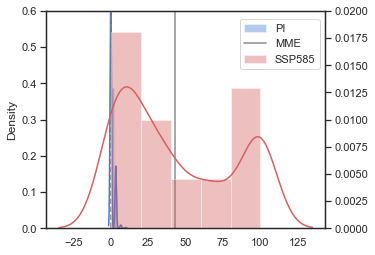

In [116]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
fig, ax1 = plt.subplots(figsize=(5,4))

ax1=sns.distplot(np.asarray(pinev), bins=5,hist=True, color='b',label='PI')  #, ax=axes[0, 0])hist=False,
ax1.set_ylim([0,.6])

ax2 = ax1.twinx()
ax2=sns.distplot(np.asarray(funev), bins=5,hist=True,color='r',label='SSP585')  #, ax=axes[0, 0])bins=10,
ax2.set_ylim([0,0.02])
ax2.set_ylabel('')

plt.axvline(x=0,linestyle='--',color='gray',zorder=0)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
plt.axvline(x=diff_mean.mean(),color='k',alpha=.5,label='MME',zorder=0)
#plt.errorbar(diff_mean.mean(), .01, xerr=diff_spread,color='r')
fig.legend(bbox_to_anchor=(.9, .87))
    
plt.show()

In [117]:
from scipy import stats
x=np.asarray(funev).flatten()
y=np.asarray(pinev).flatten()
print(stats.kstest( x,y,alternative='less'))
print(stats.mannwhitneyu(x,y,alternative='greater'))

KstestResult(statistic=0.8295454545454546, pvalue=2.552888479965226e-123)
MannwhitneyuResult(statistic=113865.5, pvalue=3.3534757193339745e-91)


In [118]:
nev=[np.asarray(pinev),np.asarray(funev),diff_a]
np.save(loc+'_ca_with_trend.npy',nev)

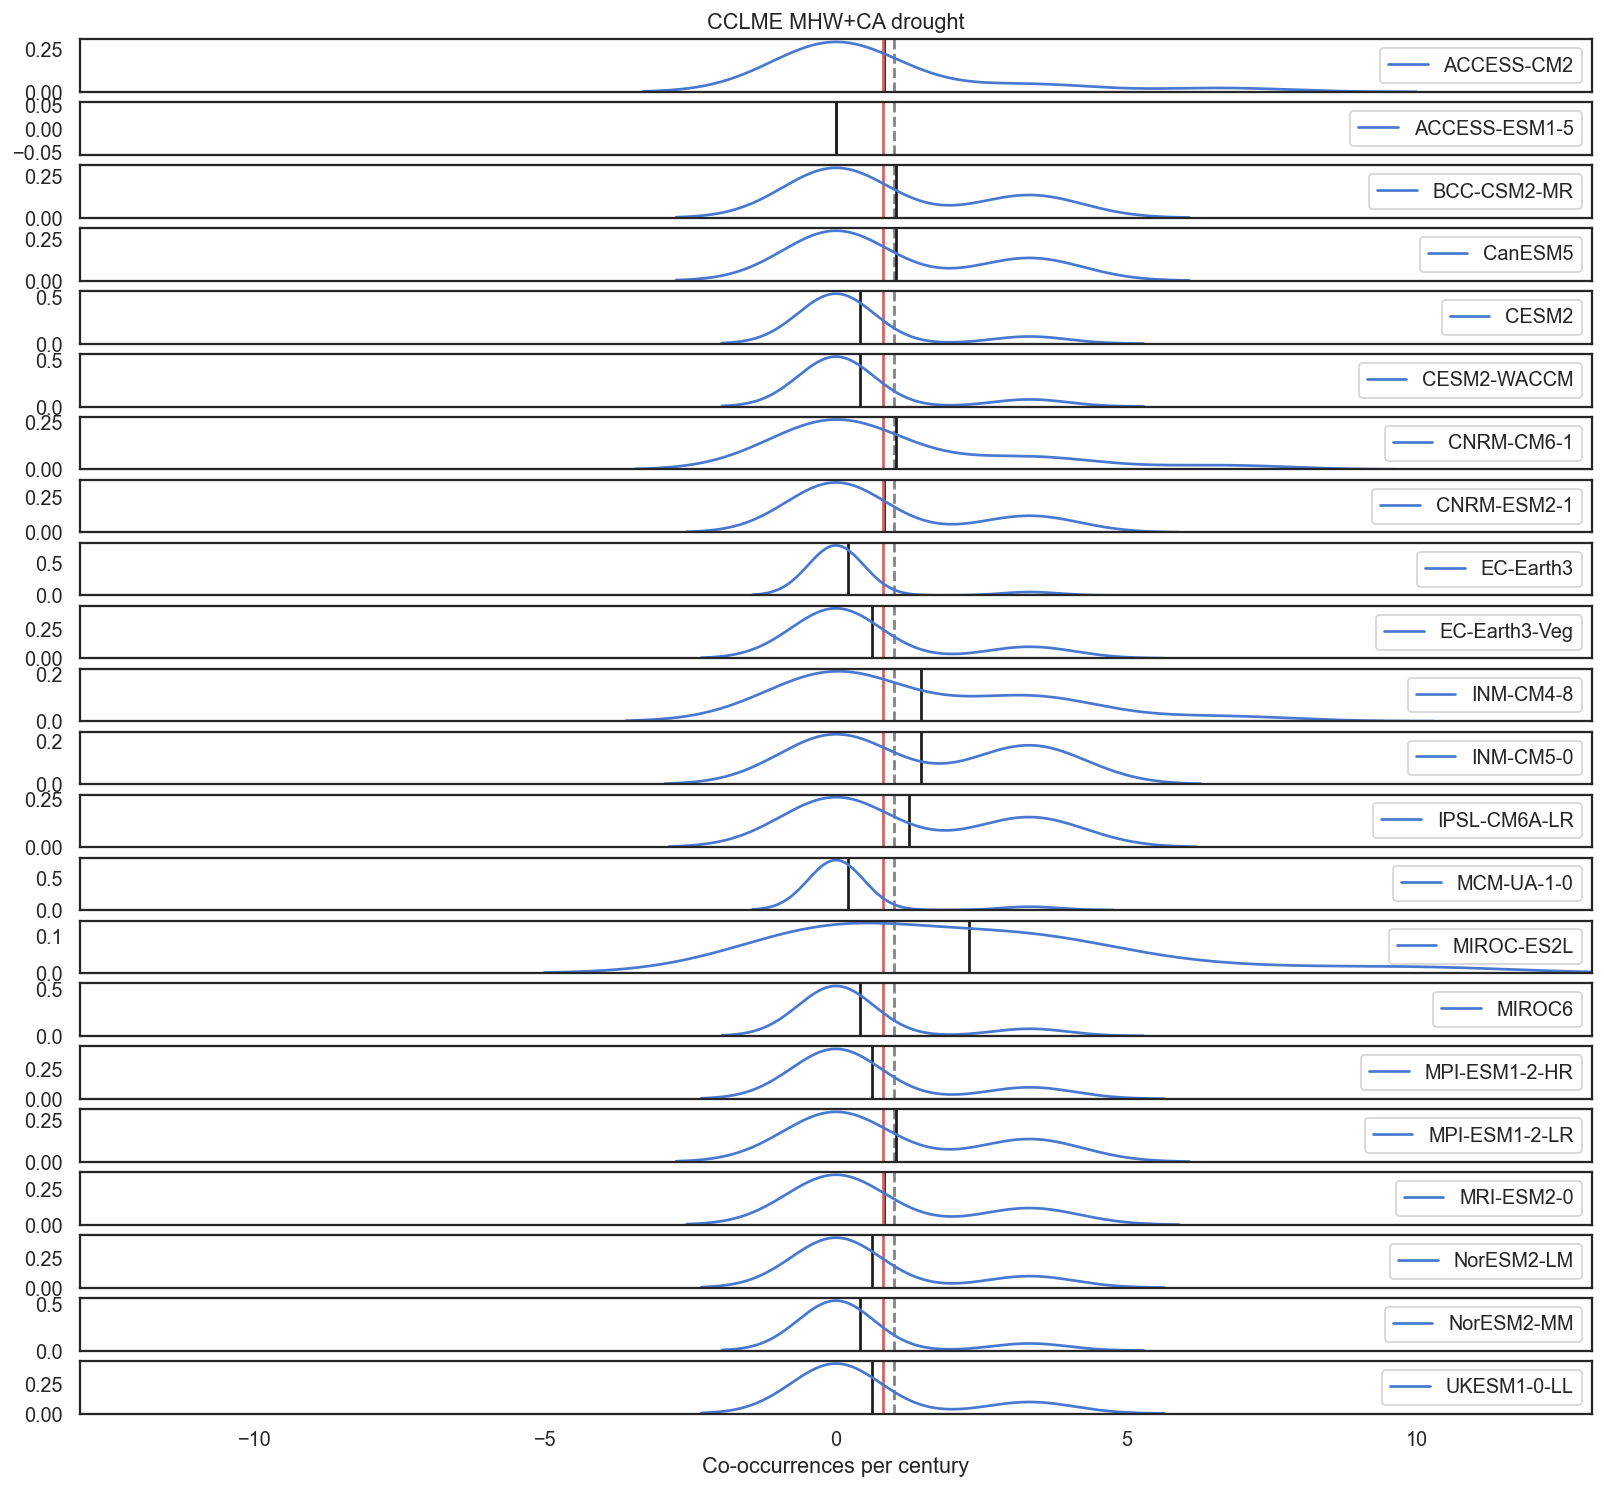

In [121]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(15,14),dpi=130)
nmdl=22
mdl_list=['ACCESS-CM2',    'ACCESS-ESM1-5',  'BCC-CSM2-MR',   'CanESM5',  'CESM2',  
         'CESM2-WACCM',  'CNRM-CM6-1',  'CNRM-ESM2-1',  'EC-Earth3',  'EC-Earth3-Veg',   
         'INM-CM4-8',  'INM-CM5-0',  'IPSL-CM6A-LR',  'MCM-UA-1-0',  'MIROC-ES2L',  'MIROC6', 
        'MPI-ESM1-2-HR',  'MPI-ESM1-2-LR',  'MRI-ESM2-0',  'NorESM2-LM',  'NorESM2-MM',  'UKESM1-0-LL']
for i in range(nmdl):
    ax = plt.subplot(22,1,i+1)
    lbl=mdl_list[i]
    fig=sns.distplot(np.asarray(pinev)[:,i],  hist=False, kde_kws={"label": lbl })  #, ax=axes[0, 0])
    if np.asarray(pinev)[:,i].std() ==0:
        plt.axvline(x=np.asarray(pinev)[:,i].mean(),color='b',label=lbl,zorder=0)

    plt.axvline(x=1,linestyle='--',color='gray',zorder=0)
    diff_mean=np.mean(diff_a,axis=0)
    diff_spread=np.std(diff_mean)
    plt.axvline(x=np.asarray(pinev)[:,i].mean(),color='k',zorder=0)
    plt.axvline(x=np.asarray(pinev).mean(),color='r',zorder=0)
    plt.xlim([-13,13])
    #plt.yticks([])
    plt.ylabel("")
    if i ==0:
        plt.title(loc.upper()+' MHW+CA drought')
    plt.legend(loc='right')
lower_error = diff_mean.mean()-diff_spread
upper_error = diff_mean.mean()+diff_spread
#plt.errorbar(diff_mean.mean(), .1, xerr=diff_spread,color='k')
#print(diff_mean.mean(),diff_spread)
#plt.yscale('log')
#plt.legend(fontsize=8,loc='upper right', bbox_to_anchor=(1.5, .9))  
#plt.ylabel('density')
plt.xlabel('Co-occurrences per century')

plt.show()



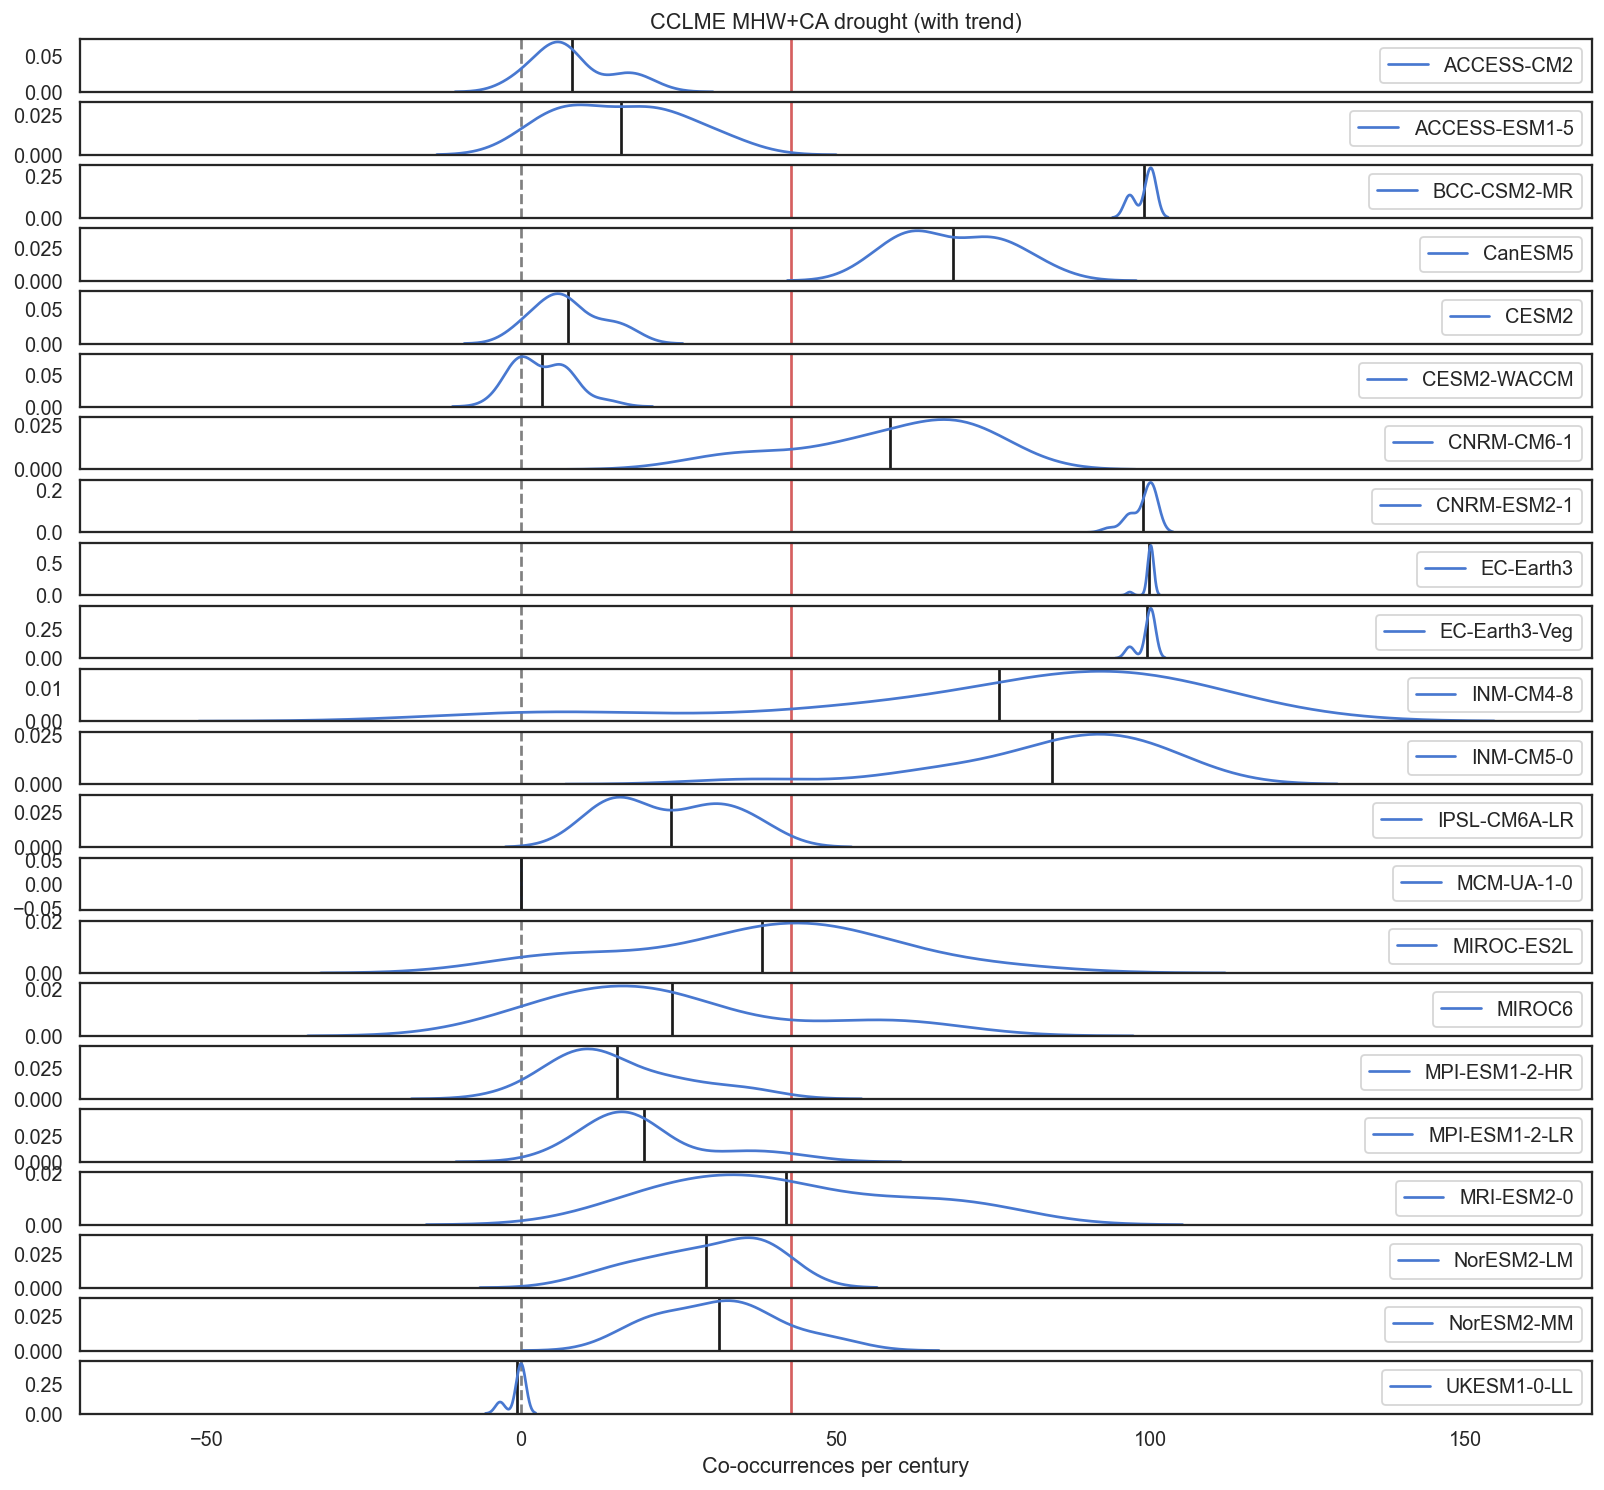

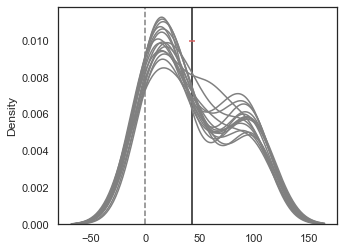

In [76]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(15,14),dpi=130)
nmdl=22
mdl_list=['ACCESS-CM2',    'ACCESS-ESM1-5',  'BCC-CSM2-MR',   'CanESM5',  'CESM2',  
         'CESM2-WACCM',  'CNRM-CM6-1',  'CNRM-ESM2-1',  'EC-Earth3',  'EC-Earth3-Veg',   
         'INM-CM4-8',  'INM-CM5-0',  'IPSL-CM6A-LR',  'MCM-UA-1-0',  'MIROC-ES2L',  'MIROC6', 
        'MPI-ESM1-2-HR',  'MPI-ESM1-2-LR',  'MRI-ESM2-0',  'NorESM2-LM',  'NorESM2-MM',  'UKESM1-0-LL']
for i in range(nmdl):
    ax = plt.subplot(22,1,i+1)
    lbl=mdl_list[i]
    fig=sns.distplot(diff_a[:,i],  hist=False, kde_kws={"label": lbl })  #, ax=axes[0, 0])
    if diff_a[:,i].std() ==0:
        plt.axvline(x=diff_a[:,i].mean(),color='b',label=lbl,zorder=0)

    plt.axvline(x=0,linestyle='--',color='gray',zorder=0)
    diff_mean=np.mean(diff_a,axis=0)
    diff_spread=np.std(diff_mean)
    plt.axvline(x=diff_mean[i],color='k',zorder=0)
    plt.axvline(x=diff_mean.mean(),color='r',zorder=0)
    plt.xlim([-70,170])
    #plt.yticks([])
    plt.ylabel("")
    plt.legend(loc='right')
    if i ==0:
        plt.title(loc.upper()+' MHW+CA drought (with trend)')
lower_error = diff_mean.mean()-diff_spread
upper_error = diff_mean.mean()+diff_spread
#plt.errorbar(diff_mean.mean(), .1, xerr=diff_spread,color='k')
#print(diff_mean.mean(),diff_spread)
#plt.yscale('log')
#plt.legend(fontsize=8,loc='upper right', bbox_to_anchor=(1.5, .9))  
#plt.ylabel('density')
plt.xlabel('Co-occurrences per century')
plt.show()


plt.figure(figsize=(5,4))
for k in range(N):
    fig=sns.distplot(diff_a[k,:], hist=False,color='gray')  #, ax=axes[0, 0])
plt.axvline(x=0,linestyle='--',color='gray',zorder=0)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
plt.axvline(x=diff_mean.mean(),color='k',zorder=0)
plt.errorbar(diff_mean.mean(), .01, xerr=diff_spread,color='r')
    
plt.show()


In [77]:
diff_d=np.asarray(funev).reshape(N,22).mean(axis=0)-np.asarray(pinev).reshape(N,22).mean(axis=0)
if diff_d.mean()>0:
    print(len(diff_d[diff_d>0])/22)
if diff_d.mean()<0:
    print(len(diff_d[diff_d<0])/22)
diff_d.mean()

0.9090909090909091


42.8219696969697

In [78]:
#individual extremes
np.mean(him),np.mean(fum),np.mean(hid),np.mean(fud)

(76.14583333333334, 100.0, 30.397727272727273, 43.62689393939394)

In [79]:
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(fum[k],pim[k])
    for i , j in zip_obj:
            diff.append(i-j)
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff)
diff_spread=np.std(diff)-IV
diff_mean,diff_spread

(90.0, -1.49110896125784)

In [80]:
him_a=np.asarray(fum).reshape(N,22).sum(axis=1)
pim_a=np.asarray(pim).reshape(N,22).sum(axis=1)
far=(him_a-pim_a)/him_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd,
mean_confidence_interval(far)

(0.9, 0.9, 0.9)

In [81]:
diff_d=np.asarray(fum).reshape(N,22).mean(axis=0)-np.asarray(pim).reshape(N,22).mean(axis=0)
len(diff_d[diff_d>0])/22

1.0

In [82]:
diff=list()
for k in range(len(pinev)):
    zip_obj=zip(fud[k],pid[k])
    for i , j in zip_obj:
            diff.append(i-j)
    
    #diff mean, model spread
diff_a=np.asarray(diff).reshape(N,22)
diff_mean=np.mean(diff_a,axis=1)
diff_spread=np.std(diff_mean)
diff_mean.mean(),diff_spread

(33.62689393939394, 2.551393656459227)

In [83]:
np.asarray(fum).reshape(N,22)[:,13],np.asarray(pim).reshape(N,22)[:,13]

(array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100.]),
 array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10.]))

In [84]:
him_a=np.asarray(fud).reshape(N,22).sum(axis=1)
pim_a=np.asarray(pid).reshape(N,22).sum(axis=1)
far=(him_a-pim_a)/him_a
FAR=np.mean(far)
sd=np.std(far)
FAR=np.mean(far)
cu,cl=sm.stats.proportion.proportion_confint(FAR, 1, alpha=0.05, method='normal') #'binom_test''normal'
FAR,cu,cl,sd,
mean_confidence_interval(far)

(0.7699979257960695, 0.7625942213306612, 0.7774016302614778)

In [85]:
np.asarray(fud).reshape(N,22)[:,13],np.asarray(pid).reshape(N,22)[:,13]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10.]))

In [86]:
diff_d=np.asarray(fud).reshape(N,22).mean(axis=0)-np.asarray(pid).reshape(N,22).mean(axis=0)
len(diff_d[diff_d>0])/22

0.7727272727272727